In [9]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [10]:
import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_10620\4241100378.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [11]:
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


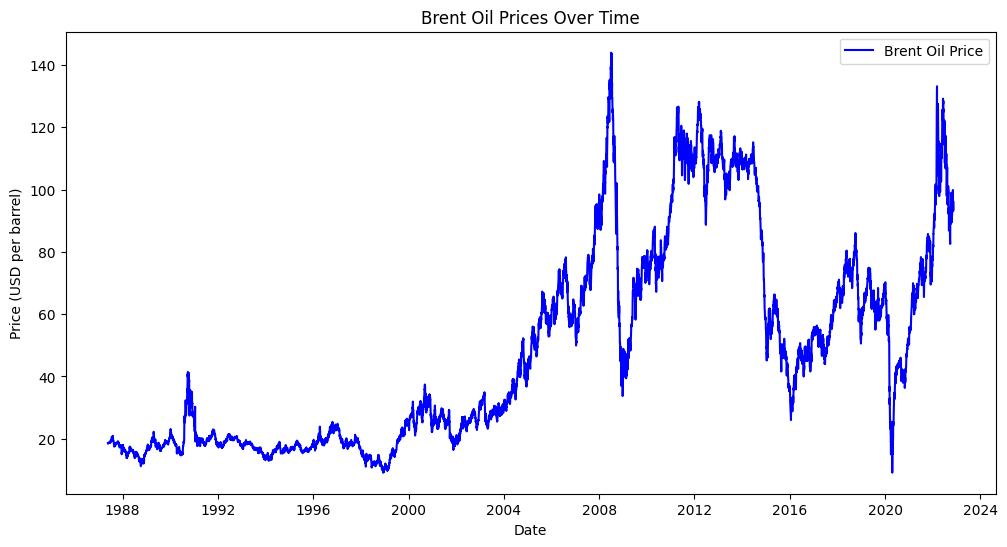

In [12]:
import matplotlib.pyplot as plt

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [14]:
# Differencing the series
data['Price_diff'] = data['Price'].diff().dropna()

# Re-run the ADF test on the differenced data
result_diff = adfuller(data['Price_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -15.52936758004806
p-value after differencing: 2.2307405105160745e-28


<Figure size 1200x600 with 0 Axes>

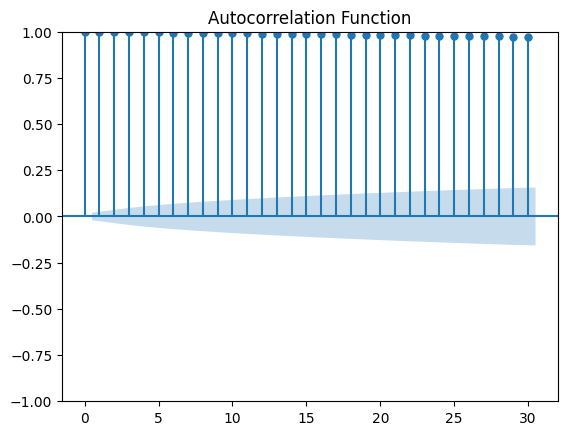

<Figure size 1200x600 with 0 Axes>

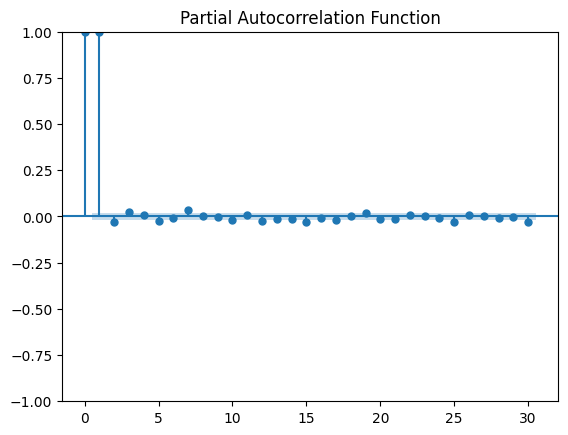

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()

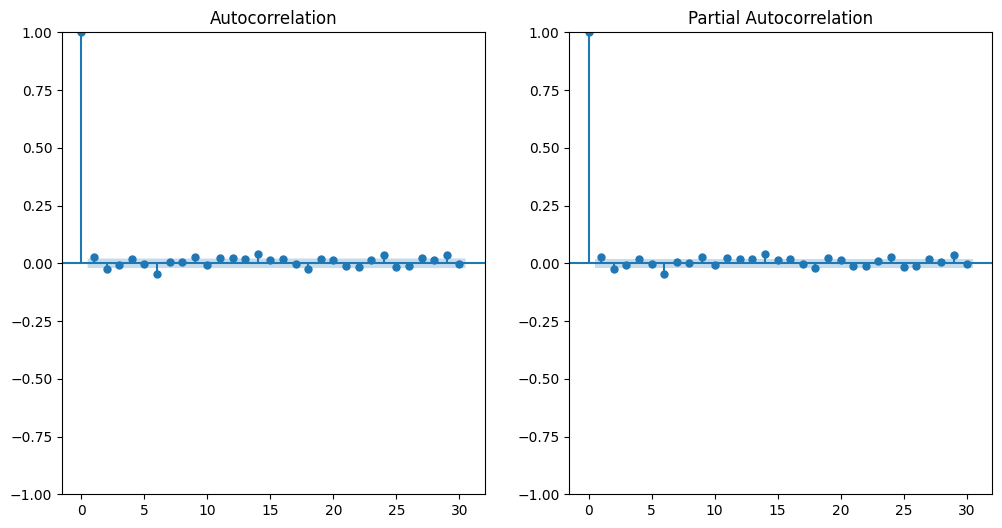

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Tue, 25 Feb 2025   AIC                          29093.899
Time:                        19:16:46   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data['Price_diff'].dropna(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data['Price_diff'].dropna(), lags=30, ax=ax[1])
plt.show()

# Fit the ARIMA model
p = 1  # Set based on ACF/PACF
d = 1  # We differenced once
q = 1  # Set based on ACF/PACF

model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

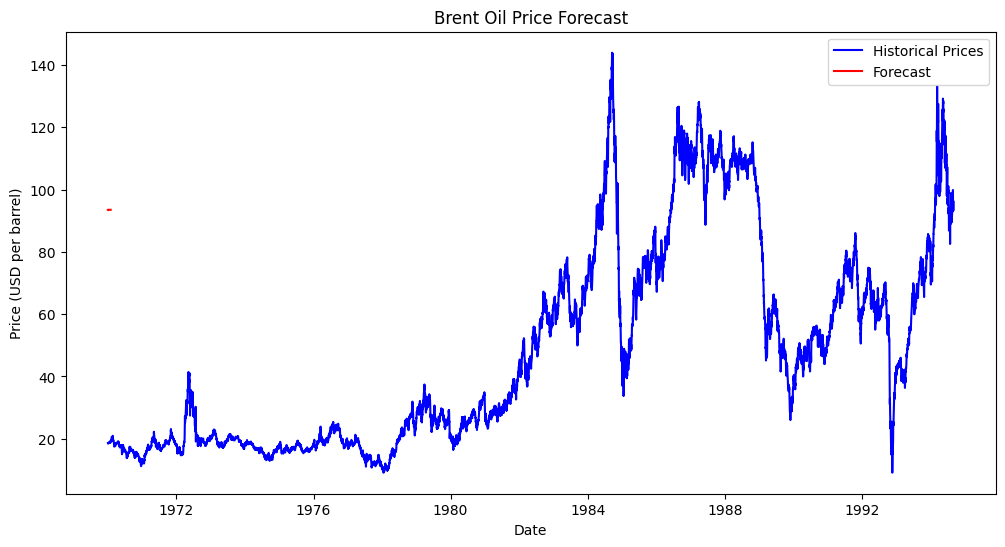

In [17]:
# Forecasting
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days

# Plotting the historical prices and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

In [18]:
import sys
sys.path.append(r'C:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts')

from analyze_price_with_arima import analyze_brent_prices_with_arima

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported inde

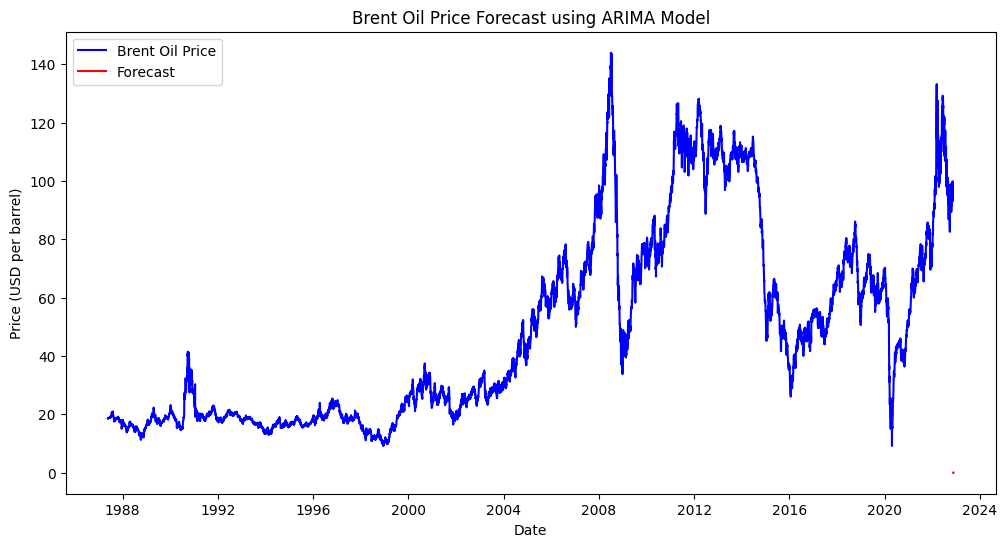

9010   -0.062187
9011    0.006919
9012    0.008676
9013    0.008721
9014    0.008722
Name: predicted_mean, dtype: float64


In [19]:
# Analyze the Brent oil prices using ARIMA
forecast, ms_model_fit = analyze_brent_prices_with_arima(data, forecast_steps=5)

# Display the forecasted values
print(forecast)

In [20]:
from lstm_data import prepare_data_for_lstm

# Prepare data for LSTM
X, y, scaler = prepare_data_for_lstm('../data/BrentOilPrices.csv', time_steps=30)

c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\scripts\lstm_data.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'])


In [21]:
from train_lstm import create_and_train_lstm

# Train the LSTM model
model = create_and_train_lstm(X, y, epochs=50, batch_size=32)

c:\Users\Semir AI Legend\Desktop\Oil-price-analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0081
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.0874e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.0447e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.6209e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.2786e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.5713e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.9201e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.7009e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3877e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2197e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3836e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.1059e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0759e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


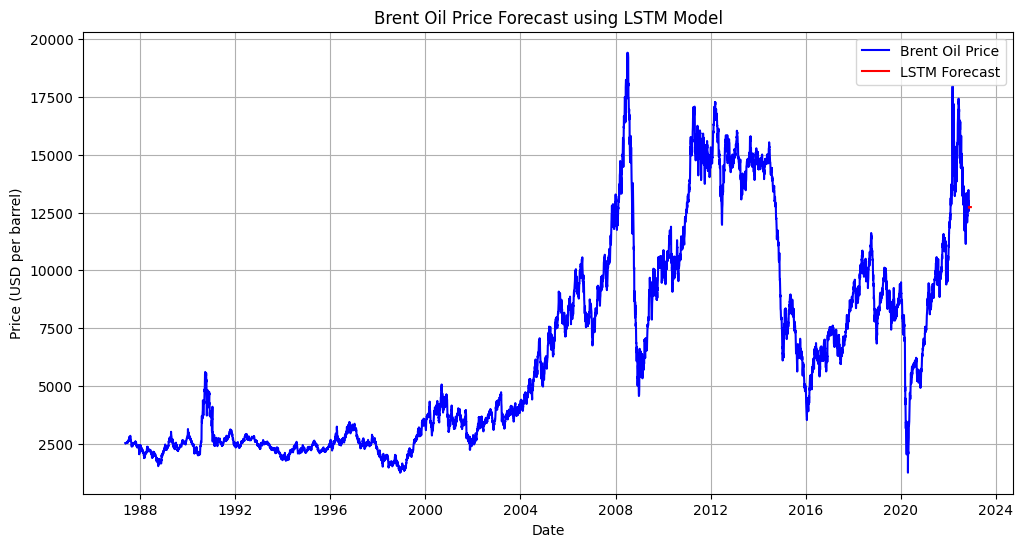

In [22]:
def forecast_with_lstm(model, scaler, brent_data, time_steps=1, forecast_steps=5):
    # Create the input for forecasting
    last_data = brent_data['Price'].values[-time_steps:]
    last_data = last_data.reshape(-1, 1)
    last_scaled = scaler.transform(last_data)

    X_forecast = []
    for _ in range(forecast_steps):
        X_forecast.append(last_scaled)
        last_scaled = np.append(last_scaled[1:], [[last_scaled[-1]]]).reshape(-1, 1)
    
    X_forecast = np.array(X_forecast)
    X_forecast = np.reshape(X_forecast, (X_forecast.shape[0], X_forecast.shape[1], 1))
    
    # Make predictions
    predictions = model.predict(X_forecast)
    predictions = scaler.inverse_transform(predictions)  # Reverse scaling

    return predictions
def plot_lstm_predictions(brent_data, predictions, scaler, time_steps=30):
    # Inverse transform the predictions to original scale
    predictions_inverse = scaler.inverse_transform(predictions)

    # Prepare historical data for plotting
    train_data = brent_data['Price'].values
    train_data_inverse = scaler.inverse_transform(train_data.reshape(-1, 1))

    # Create an array for the total length of the time series
    full_data = np.empty((len(train_data) + len(predictions),))
    full_data[:len(train_data)] = train_data_inverse[:, 0]
    full_data[len(train_data):] = np.nan  # Placeholder for predictions

    # Plot the historical data
    plt.figure(figsize=(12, 6))
    plt.plot(brent_data.index, train_data_inverse, label='Brent Oil Price', color='blue')

    # Create forecast index
    forecast_index = pd.date_range(start=brent_data.index[-1] + pd.Timedelta(days=1), 
                                    periods=len(predictions))

    # Plot the predictions
    plt.plot(forecast_index, predictions_inverse, label='LSTM Forecast', color='red')

    plt.title('Brent Oil Price Forecast using LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per barrel)')
    plt.legend()
    plt.grid()
    plt.show()

forecast_with_lstm(model, scaler, data, time_steps=30, forecast_steps=30)
plot_lstm_predictions(data, forecast_with_lstm(model, scaler, data, time_steps=30, forecast_steps=30), scaler, time_steps=30)

In [23]:
import pandas as pd

# Load the file, ensuring all columns are read
file_path = "../data/BrentOilPrices.csv"  # Update with actual path
data = pd.read_csv(file_path)

# Print the first few rows to inspect
print(data.head())
print(data.columns)


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
Index(['Date', 'Price'], dtype='object')


C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_10620\3257340243.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


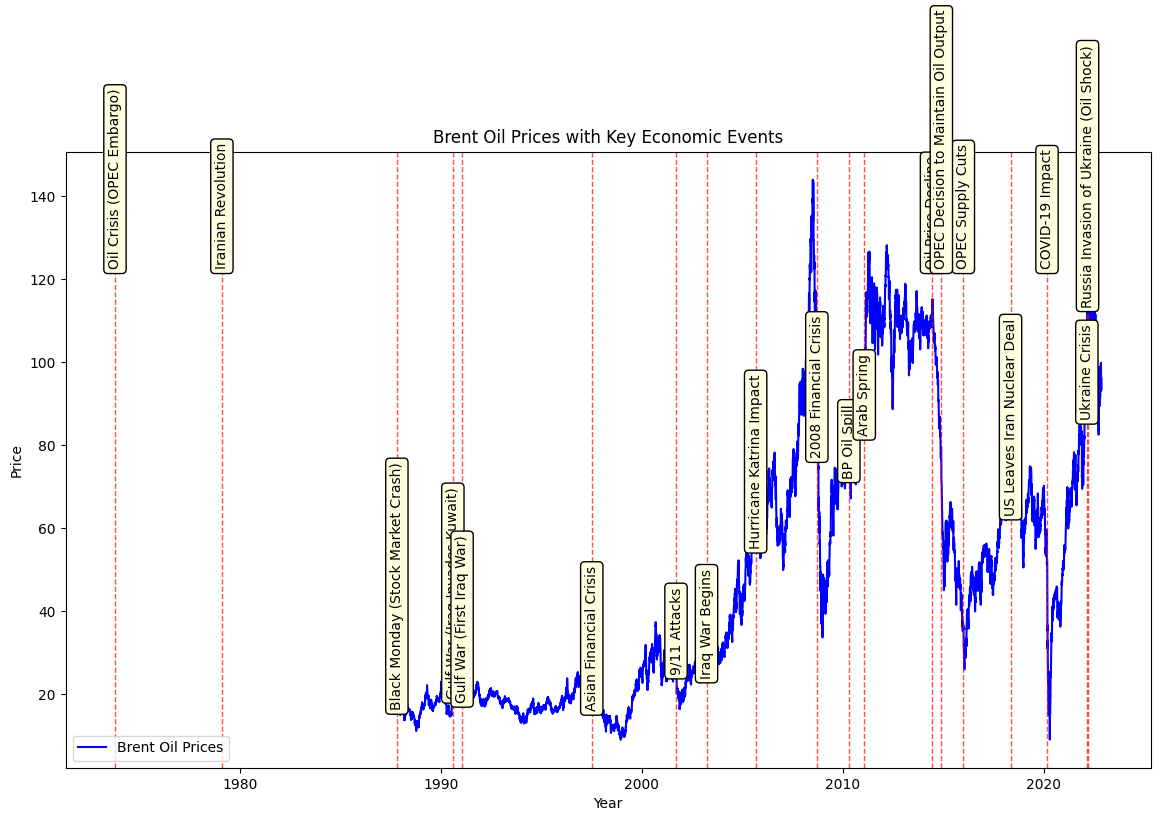

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Remove any rows with invalid or missing dates
data = data.dropna(subset=['Date'])

# Extended list of events to annotate
events = {
    '1987-10-19': 'Black Monday (Stock Market Crash)',
    '1990-08-02': 'Gulf War (Iraq Invades Kuwait)',
    '1997-07-02': 'Asian Financial Crisis',
    '2001-09-11': '9/11 Attacks',
    '2003-03-20': 'Iraq War Begins',
    '2008-09-15': '2008 Financial Crisis',
    '2010-04-20': 'BP Oil Spill',
    '2011-01-25': 'Arab Spring',
    '2014-06-01': 'Oil Price Decline',
    '2016-01-01': 'OPEC Supply Cuts',
    '2020-03-01': 'COVID-19 Impact',
    '2022-02-24': 'Ukraine Crisis',
    '1973-10-06': 'Oil Crisis (OPEC Embargo)',
    '1979-02-01': 'Iranian Revolution',
    '1991-01-17': 'Gulf War (First Iraq War)',
    '2005-08-29': 'Hurricane Katrina Impact',
    '2014-11-27': 'OPEC Decision to Maintain Oil Output',
    '2018-05-08': 'US Leaves Iran Nuclear Deal',
    '2022-03-08': 'Russia Invasion of Ukraine (Oil Shock)'
}

# Plotting the Brent oil prices
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Price'], label='Brent Oil Prices', color='blue')

# Loop over each event in the dictionary to add vertical lines and annotations
for date, label in events.items():
    event_date = pd.to_datetime(date)
    event_price = data.loc[data['Date'] == event_date, 'Price'].max() if event_date in data['Date'].values else data['Price'].max()
    
    # Draw a vertical line for the event
    plt.axvline(x=event_date, color='red', linestyle='--', linewidth=1, alpha=0.7)
    
    # Annotate the event
    plt.annotate(label, 
                 xy=(event_date, event_price * 0.8), 
                 xytext=(event_date, event_price * 0.85),
                 rotation=90, color='black', 
                 ha='center', va='bottom', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"))

# Adding labels and title
plt.title('Brent Oil Prices with Key Economic Events')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

# GDP

In [25]:
# Step 1: Import necessary libraries
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt
start_date = datetime.datetime(1987, 5, 20)
end_date = datetime.datetime(2022, 9, 30)

countries = ['USA', 'EUU', 'CHN']  # 'EUU' is the World Bank code for the European Union
gdp_data = wbdata.get_dataframe({'NY.GDP.MKTP.CD': 'GDP Growth (%)'}, country=countries)
gdp_data.reset_index(inplace=True)
print(gdp_data.dtypes)  # Check the data types of your columns
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data = gdp_data[(gdp_data['date'] >= start_date) & (gdp_data['date'] <= end_date)]
print(gdp_data)
inflation_data = wbdata.get_dataframe({'FP.CPI.TOTL': 'Inflation Rate (%)'}, country=countries)
inflation_data.reset_index(inplace=True)
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data = inflation_data[(inflation_data['date'] >= start_date) & (inflation_data['date'] <= end_date)]

print(inflation_data)
unemployment_data = wbdata.get_dataframe({'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)'}, country=countries)
unemployment_data.reset_index(inplace=True)
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])

unemployment_data = unemployment_data[(unemployment_data['date'] >= start_date) & (unemployment_data['date'] <= end_date)]

print(unemployment_data)
exchange_rate_data = wbdata.get_dataframe({'PA.NUS.FCRF': 'Exchange Rate (Local Currency per USD)'}, country=countries)

exchange_rate_data.reset_index(inplace=True)
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])
exchange_rate_data = exchange_rate_data[(exchange_rate_data['date'] >= start_date) & (exchange_rate_data['date'] <= end_date)]

print(exchange_rate_data)
renewable_energy_data = wbdata.get_dataframe({'EG.FEC.RNEW.ZS': 'Renewable Energy Consumption (% of total energy)'}, country=countries)
renewable_energy_data.reset_index(inplace=True)
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
renewable_energy_data = renewable_energy_data[(renewable_energy_data['date'] >= start_date) & (renewable_energy_data['date'] <= end_date)]

try:
    env_regulations_data = wbdata.get_dataframe({'CC.ENTX.ENV.ZS': 'Total Environmental Tax Revenue (% of GDP)'}, country=countries)
    env_regulations_data.reset_index(inplace=True)
    env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
    print("Environmental Regulations Data:")
    print(env_regulations_data)
except Exception as e:
    print(f"Error fetching environmental regulations data: {e}")

try:
    trade_data = wbdata.get_dataframe({'BN.GSR.GNFS.CD': 'Net Trade in Goods and Services (BoP, current US$)'}, country=countries)
    trade_data.reset_index(inplace=True)
    trade_data['date'] = pd.to_datetime(trade_data['date'])
    print("Trade Policies Data:")
    print(trade_data)
except Exception as e:
    print(f"Error fetching trade policies data: {e}")
natural_gas_indicator = 'EG.ELC.NGAS.ZS'  # Electricity production from natural gas sources (% of total)

try:
    natural_gas_data = wbdata.get_dataframe({natural_gas_indicator: 'Electricity Production from Natural Gas (%)'}, country=countries)
    
    # Check if the data is returned as expected
    if natural_gas_data is None or natural_gas_data.empty:
        raise ValueError("No data returned for the specified indicator.")

    # Reset index for easier manipulation
    natural_gas_data.reset_index(inplace=True)
    natural_gas_data['date'] = pd.to_datetime(natural_gas_data['date'])
    print("Natural Gas Data:")
    print(natural_gas_data)
except Exception as e:
    print(f"Error fetching natural gas data: {e}")

country            object
date               object
GDP Growth (%)    float64
dtype: object
           country       date  GDP Growth (%)
1            China 2022-01-01    1.788178e+13
2            China 2021-01-01    1.782046e+13
3            China 2020-01-01    1.468774e+13
4            China 2019-01-01    1.427997e+13
5            China 2018-01-01    1.389491e+13
..             ...        ...             ...
159  United States 1992-01-01    6.520327e+12
160  United States 1991-01-01    6.158129e+12
161  United States 1990-01-01    5.963144e+12
162  United States 1989-01-01    5.641580e+12
163  United States 1988-01-01    5.236438e+12

[105 rows x 3 columns]
           country       date  Inflation Rate (%)
1            China 2022-01-01          131.919357
2            China 2021-01-01          129.366217
3            China 2020-01-01          128.109444
4            China 2019-01-01          125.083154
5            China 2018-01-01          121.558878
..             ...        ...   

In [26]:
import pandas as pd

inflation_data = pd.DataFrame(inflation_data)
print(inflation_data.head()) 

  country       date  Inflation Rate (%)
1   China 2022-01-01          131.919357
2   China 2021-01-01          129.366217
3   China 2020-01-01          128.109444
4   China 2019-01-01          125.083154
5   China 2018-01-01          121.558878


In [27]:
oil_file_path = r"../data/BrentOilPrices.csv"
brent_data = pd.read_csv(oil_file_path)

# Specify the date format explicitly (modify this based on your actual date format in the CSV)
brent_data['Date'] = pd.to_datetime(brent_data['Date'], format='%Y-%m-%d', errors='coerce')

# Set 'Date' as the index
brent_data.set_index('Date', inplace=True)

# Reset index, and rename 'Date' to 'date' for consistency
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Check the dataframe
print(brent_data.head())

  date  Price
0  NaT  18.63
1  NaT  18.45
2  NaT  18.55
3  NaT  18.60
4  NaT  18.63


In [28]:
# Read the data with the correct date format
brent_data = pd.read_csv(oil_file_path)

# Specify the correct format for the date column
brent_data['Date'] = pd.to_datetime(brent_data['Date'], format='%d-%b-%y', errors='coerce')

# Set 'Date' as the index
brent_data.set_index('Date', inplace=True)

# Reset index, and rename 'Date' to 'date' for consistency
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Check the dataframe
print(brent_data.head())

        date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [29]:
# to datetime
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
brent_data['date'] = pd.to_datetime(brent_data['date'])
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
trade_data['date'] = pd.to_datetime(trade_data['date'])
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])

#extract year
gdp_data['year'] = gdp_data['date'].dt.year
brent_data['year'] = brent_data['date'].dt.year 
inflation_data['year'] = inflation_data['date'].dt.year 
env_regulations_data['year'] = env_regulations_data['date'].dt.year 
trade_data['year'] = trade_data['date'].dt.year 
renewable_energy_data['year'] = renewable_energy_data['date'].dt.year 
unemployment_data['year'] = unemployment_data['date'].dt.year 
exchange_rate_data['year'] = exchange_rate_data['date'].dt.year 

In [30]:
# merge
all_data = brent_data.merge(gdp_data,on='year',how='left')
all_data = all_data.merge(inflation_data[['Inflation Rate (%)','year']],on='year',how='left')
all_data = all_data.merge(env_regulations_data[['Total Environmental Tax Revenue (% of GDP)','year']], on='year', how='left')
all_data = all_data.merge(trade_data[['Net Trade in Goods and Services (BoP, current US$)','year']], on='year',how='left')
all_data = all_data.merge(renewable_energy_data[['Renewable Energy Consumption (% of total energy)','year']], on='year', how='left')
all_data = all_data.merge(exchange_rate_data[['Exchange Rate (Local Currency per USD)','year']],on='year',how='left')
all_data = all_data.merge(unemployment_data[['Unemployment Rate (%)','country','year']], on='year', how='left')

In [31]:
all_data.head()

,date_x,Price,year,country_x,date_y,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Exchange Rate (Local Currency per USD),Unemployment Rate (%),country_y
0,1987-05-20,18.63,1987.0,NaN,NaT,NaN,NaN,NaN,2.910000e+08,NaN,NaN,NaN,NaN
1,1987-05-20,18.63,1987.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-05-20,18.63,1987.0,NaN,NaT,NaN,NaN,NaN,-1.516750e+11,NaN,NaN,NaN,NaN
3,1987-05-20,18.63,1987.0,NaN,NaT,NaN,NaN,NaN,2.910000e+08,NaN,NaN,NaN,NaN
4,1987-05-20,18.63,1987.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Separate numeric and non-numeric columns
numeric_columns = all_data.select_dtypes(include='number').columns
non_numeric_columns = all_data.select_dtypes(exclude='number').columns

# Fill NaN values in numeric columns with the median
all_data[numeric_columns] = all_data[numeric_columns].fillna(all_data[numeric_columns].median())

# Check the info and null values
all_data.info()
print(f'null values \n\n{all_data.isna().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957211 entries, 0 to 11957210
Data columns (total 13 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   date_x                                              datetime64[ns]
 1   Price                                               float64       
 2   year                                                float64       
 3   country_x                                           object        
 4   date_y                                              datetime64[ns]
 5   GDP Growth (%)                                      float64       
 6   Inflation Rate (%)                                  float64       
 7   Total Environmental Tax Revenue (% of GDP)          float64       
 8   Net Trade in Goods and Services (BoP, current US$)  float64       
 9   Renewable Energy Consumption (% of total energy)    float64       
 10  Exchange Rate (L

In [38]:
import pandas as pd

# Reset index
all_data = all_data.reset_index()

# Select only numeric columns to calculate median
numeric_cols = all_data.select_dtypes(include=['number']).columns

# Fill NaN values only for numeric columns
all_data[numeric_cols] = all_data[numeric_cols].fillna(all_data[numeric_cols].median())

# Display dataset info
all_data.info()

# Check for remaining null values
print(f'Null values:\n\n{all_data.isna().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957211 entries, 0 to 11957210
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   level_0                                             int64         
 1   index                                               int64         
 2   date_x                                              datetime64[ns]
 3   Price                                               float64       
 4   year                                                float64       
 5   country_x                                           object        
 6   date_y                                              datetime64[ns]
 7   GDP Growth (%)                                      float64       
 8   Inflation Rate (%)                                  float64       
 9   Total Environmental Tax Revenue (% of GDP)          float64       
 10  Net Trade in Goo

In [41]:
import pandas as pd

# Ensure index reset does not duplicate existing columns
all_data = all_data.reset_index(drop=True)  # `drop=True` prevents inserting an extra column

# Select only numeric columns for filling missing values
numeric_cols = all_data.select_dtypes(include=['number']).columns

# Fill NaN values only for numeric columns using median
all_data[numeric_cols] = all_data[numeric_cols].fillna(all_data[numeric_cols].median())

# Display dataset info
all_data.info()

# Check for remaining null values
print(f"Null values:\n\n{all_data.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957211 entries, 0 to 11957210
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   level_0                                             int64         
 1   index                                               int64         
 2   date_x                                              datetime64[ns]
 3   Price                                               float64       
 4   year                                                float64       
 5   country_x                                           object        
 6   date_y                                              datetime64[ns]
 7   GDP Growth (%)                                      float64       
 8   Inflation Rate (%)                                  float64       
 9   Total Environmental Tax Revenue (% of GDP)          float64       
 10  Net Trade in Goo

In [42]:
all_data.head()

,level_0,index,date_x,Price,year,country_x,date_y,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Exchange Rate (Local Currency per USD),Unemployment Rate (%),country_y
0,0,0,1987-05-20,18.63,1987.0,NaN,NaT,8.532185e+12,84.999377,0.713,2.910000e+08,10.2,2.36105,5.529,NaN
1,1,1,1987-05-20,18.63,1987.0,NaN,NaT,8.532185e+12,84.999377,0.713,-2.133850e+10,10.2,2.36105,5.529,NaN
2,2,2,1987-05-20,18.63,1987.0,NaN,NaT,8.532185e+12,84.999377,0.713,-1.516750e+11,10.2,2.36105,5.529,NaN
3,3,3,1987-05-20,18.63,1987.0,NaN,NaT,8.532185e+12,84.999377,0.713,2.910000e+08,10.2,2.36105,5.529,NaN
4,4,4,1987-05-20,18.63,1987.0,NaN,NaT,8.532185e+12,84.999377,0.713,-2.133850e+10,10.2,2.36105,5.529,NaN


In [43]:
print(all_data.columns)


Index(['level_0', 'index', 'date_x', 'Price', 'year', 'country_x', 'date_y',
       'GDP Growth (%)', 'Inflation Rate (%)',
       'Total Environmental Tax Revenue (% of GDP)',
       'Net Trade in Goods and Services (BoP, current US$)',
       'Renewable Energy Consumption (% of total energy)',
       'Exchange Rate (Local Currency per USD)', 'Unemployment Rate (%)',
       'country_y'],
      dtype='object')


In [46]:
all_data = all_data[['date_x', 'Price', 'year', 'GDP Growth (%)', 
                     'Inflation Rate (%)', 'Total Environmental Tax Revenue (% of GDP)']]
all_data.describe()

,date_x,Price,year,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP)
count,11956560,1.195721e+07,1.195721e+07,1.195721e+07,1.195721e+07,1.195721e+07
mean,2004-02-23 01:14:11.544993536,4.700388e+01,2.003648e+03,9.263224e+12,8.578409e+01,7.232926e-01
min,1987-05-20 00:00:00,9.100000e+00,1.987000e+03,3.123536e+11,3.318724e+01,7.130000e-01
25%,1996-01-19 00:00:00,1.890000e+01,1.996000e+03,5.236438e+12,8.097002e+01,7.130000e-01
50%,2004-02-23 00:00:00,3.326000e+01,2.004000e+03,8.532185e+12,8.499938e+01,7.130000e-01
75%,2012-03-27 00:00:00,6.767000e+01,2.012000e+03,1.447423e+13,9.692240e+01,7.130000e-01
max,2020-04-21 00:00:00,1.439500e+02,2.020000e+03,2.153998e+13,1.281094e+02,1.391000e+00
std,NaN,3.258064e+01,9.336442e+00,5.641837e+12,1.852875e+01,8.290037e-02


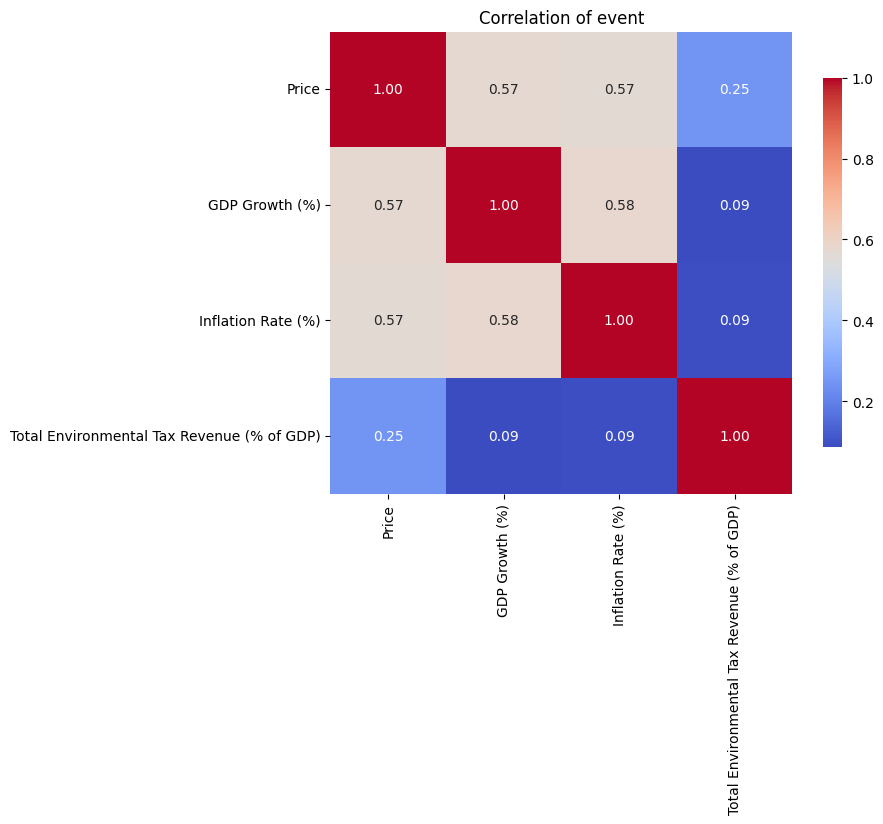

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop columns that are not needed for correlation analysis
cor_data = all_data.drop(columns=['date_x', 'year']) 

# Calculate correlation
correlation = cor_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation of event')
plt.show()

In [50]:
merged_data = all_data

Correlation between Brent Oil Prices and GDP Growth: 0.57


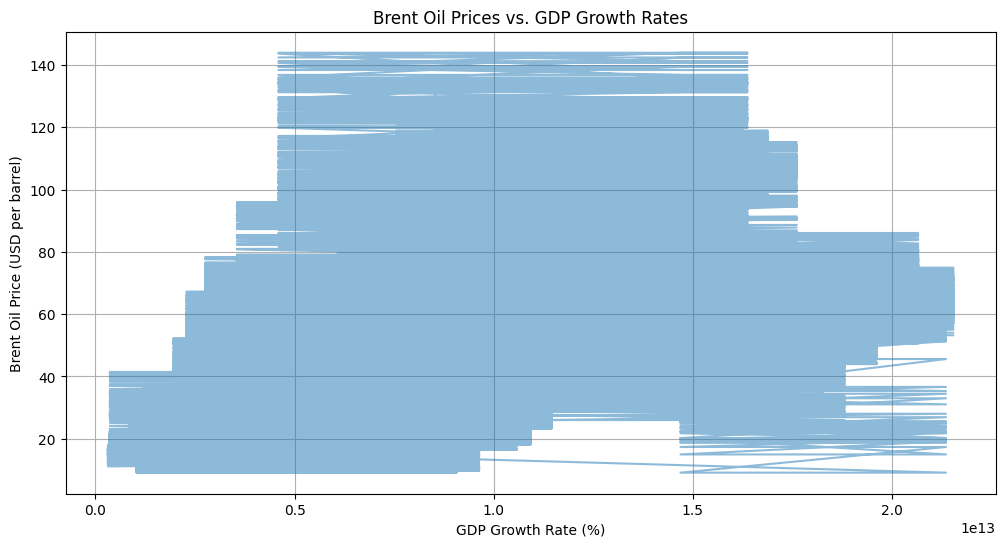

In [51]:
# Step 15: Analyze correlation
correlation = merged_data['Price'].corr(merged_data['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Step 16: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(merged_data['GDP Growth (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()

Correlation between Brent Oil Prices and Inflation Rate: 0.57


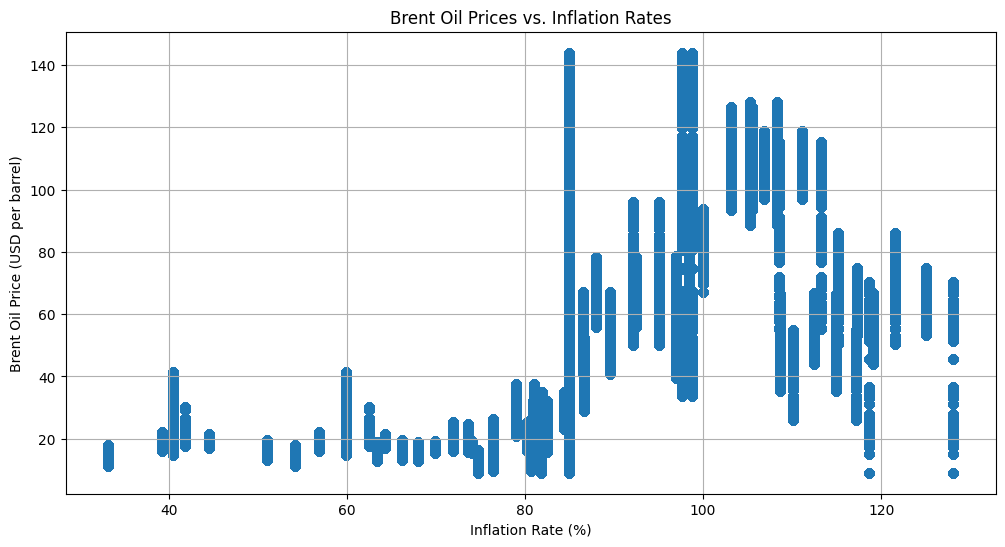

In [52]:
correlation = merged_data['Price'].corr(merged_data['Inflation Rate (%)'])
print(f"Correlation between Brent Oil Prices and Inflation Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Inflation Rate (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()

Correlation between Brent Oil Prices and GDP Growth: 0.57


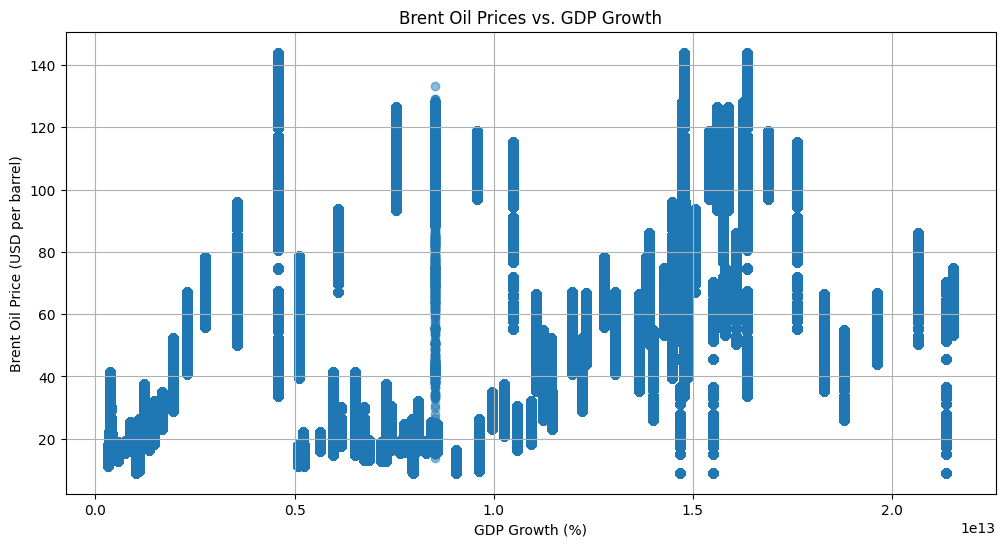

In [53]:
# Calculate the correlation between Brent Oil Prices and GDP Growth
correlation = merged_data['Price'].corr(merged_data['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['GDP Growth (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()


In [ ]:
all_data.to_csv('../data/event-data.csv')

Fetching Oil Consumption using indicator: CC.OIL.PSBC.CO
Oil Consumption Data:
    Oil Consumption_Country       date  Oil Consumption
0                     China 2100-01-01              NaN
1                     China 2050-01-01              NaN
2                     China 2049-01-01              NaN
3                     China 2048-01-01              NaN
4                     China 2047-01-01              NaN
..                      ...        ...              ...
363           United States 1964-01-01              NaN
364           United States 1963-01-01              NaN
365           United States 1962-01-01              NaN
366           United States 1961-01-01              NaN
367           United States 1960-01-01              NaN

[368 rows x 3 columns]
Fetching Natural Gas Consumption using indicator: EG.ELC.NGAS.ZS
Natural Gas Consumption Data:
    Natural Gas Consumption_Country       date  Natural Gas Consumption
0                             China 2023-01-01            

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_10620\3594716365.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')


Merging Oil Consumption data...
After merging Oil Consumption:
date                       datetime64[ns]
Price                             float64
Oil Consumption_Country            object
Oil Consumption                   float64
dtype: object
Merging Natural Gas Consumption data...
After merging Natural Gas Consumption:
date                               datetime64[ns]
Price                                     float64
Oil Consumption_Country                    object
Oil Consumption                           float64
Natural Gas Consumption_Country            object
Natural Gas Consumption                   float64
dtype: object
Merging Coal Consumption data...
After merging Coal Consumption:
date                               datetime64[ns]
Price                                     float64
Oil Consumption_Country                    object
Oil Consumption                           float64
Natural Gas Consumption_Country            object
Natural Gas Consumption                   float

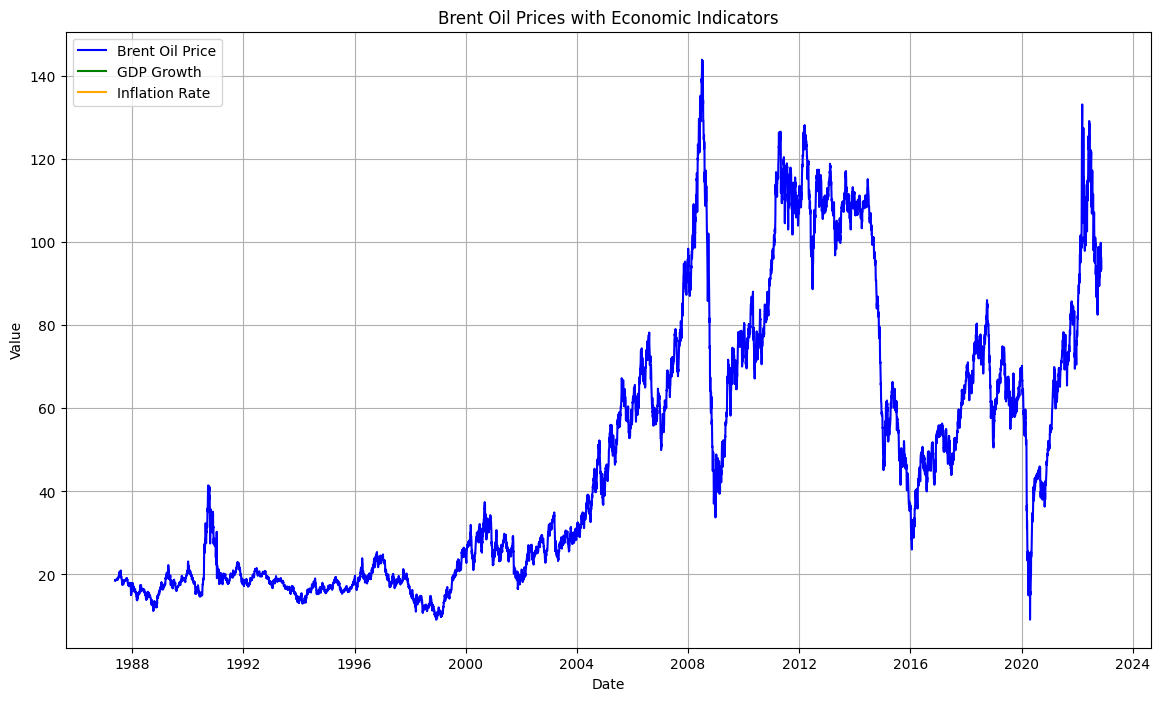

In [55]:
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Set the date range for your analysis
start_date = datetime.datetime(1987, 5, 20)
end_date = datetime.datetime(2022, 9, 30)

# Specify the countries you want to analyze
countries = ['USA', 'EUU', 'CHN', 'IND', 'JPN']

# Define indicators for different energy sources
indicators = {
    'Oil Consumption': 'CC.OIL.PSBC.CO',  # Oil consumption (% of total energy use)
    'Natural Gas Consumption': 'EG.ELC.NGAS.ZS',  # Electricity production from natural gas sources (% of total)
    'Coal Consumption': 'CC.COAL.EMIS.CH',  # Coal consumption (% of total energy use)
    'Renewable Energy Consumption': 'EG.FEC.RNEW.ZS'  # Renewable energy consumption (% of total energy use)
}

# Fetch energy data
energy_data = {}
for energy_source, indicator in indicators.items():
    try:
        print(f"Fetching {energy_source} using indicator: {indicator}")
        data = wbdata.get_dataframe({indicator: f'{energy_source}'}, country=countries)
        
        if data is None or data.empty:
            raise ValueError(f"No data returned for the {energy_source} indicator.")
        
        # Reset index for easier manipulation
        data.reset_index(inplace=True)
        data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Ensure 'date' is datetime type
        energy_data[energy_source] = data.rename(columns={'country': f'{energy_source}_Country'})
        print(f"{energy_source} Data:")
        print(energy_data[energy_source])

    except Exception as e:
        print(f"Error fetching {energy_source} data: {e}")
        energy_data[energy_source] = None

# Load Brent oil prices data
oil_file_path = r"C:\Users\Semir AI Legend\Desktop\Oil-price-analysis\data\BrentOilPrices.csv"
brent_data = pd.read_csv(oil_file_path)

# Convert 'Date' column to datetime and set as index
brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')
brent_data.set_index('Date', inplace=True)

# Ensure 'date' is datetime type in merged_data
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Ensure merged_data starts with brent_data
merged_data = brent_data.copy()

# Merge energy data with Brent oil prices
for energy_source, data in energy_data.items():
    if data is not None:
        print(f"Merging {energy_source} data...")
        # Merge data for each energy source
        merged_data = merged_data.merge(data, left_on='date', right_on='date', how='left', suffixes=('', f'_{energy_source}')).fillna(0)
        print(f"After merging {energy_source}:")
        print(merged_data.dtypes)  # Print data types to check for compatibility

# Display the merged dataset
print("Merged Data:")
print(merged_data)

# Identify and remove outliers using IQR for each energy source
for energy_source in indicators.keys():
    if f'{energy_source}' in merged_data.columns:
        column_name = f'{energy_source}'
        Q1 = merged_data[column_name].quantile(0.25)
        Q3 = merged_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        merged_data = merged_data[(merged_data[column_name] >= (Q1 - 1.5 * IQR)) & (merged_data[column_name] <= (Q3 + 1.5 * IQR))]

# Define economic indicators
economic_indicators = {
    'GDP Growth': 'NY.GDP.MKTP.CD',  # GDP growth (current US$)
    'Inflation Rate': 'FP.CPI.TOTL',  # Inflation, consumer prices (annual %)
}

# Fetch economic data
economic_data = {}
for indicator_name, indicator_code in economic_indicators.items():
    try:
        print(f"Fetching {indicator_name} using indicator: {indicator_code}")
        data = wbdata.get_dataframe({indicator_code: indicator_name}, country=countries)
        
        if data is None or data.empty:
            raise ValueError(f"No data returned for the {indicator_name} indicator.")
        
        data.reset_index(inplace=True)
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        economic_data[indicator_name] = data.rename(columns={'country': f'{indicator_name}_Country'})
        print(f"{indicator_name} Data:")
        print(economic_data[indicator_name])

    except Exception as e:
        print(f"Error fetching {indicator_name} data: {e}")
        economic_data[indicator_name] = None

# Merge economic data with your energy data
for indicator_name, data in economic_data.items():
    if data is not None:
        print(f"Merging economic data for {indicator_name}...")
        merged_data = merged_data.merge(data, on='date', how='left', suffixes=('', f'_{indicator_name}'))

# Display the updated merged dataset
print("Updated Merged Data with Economic Indicators:")
print(merged_data)

# Perform correlation analysis with the new variables
if 'Price' in merged_data.columns and 'GDP Growth' in merged_data.columns:
    correlation_gdp_energy = merged_data['Price'].corr(merged_data['GDP Growth'])
    print(f"Correlation between Brent Oil Price and GDP Growth: {correlation_gdp_energy:.2f}")

if 'Price' in merged_data.columns and 'Inflation Rate' in merged_data.columns:
    correlation_inflation_energy = merged_data['Price'].corr(merged_data['Inflation Rate'])
    print(f"Correlation between Brent Oil Price and Inflation Rate: {correlation_inflation_energy:.2f}")

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date'], merged_data['Price'], label='Brent Oil Price', color='blue')
if 'GDP Growth' in merged_data.columns:
    plt.plot(merged_data['date'], merged_data['GDP Growth'], label='GDP Growth', color='green')
if 'Inflation Rate' in merged_data.columns:
    plt.plot(merged_data['date'], merged_data['Inflation Rate'], label='Inflation Rate', color='orange')

plt.title('Brent Oil Prices with Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [56]:
# Importing functions from the script
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
# from oil_price_analysis import backtest_arima, out_of_sample_testing, time_series_cross_validation

import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())

prices = data['Price']  # assuming the dataset has a 'Price' column

C:\Users\Semir AI Legend\AppData\Local\Temp\ipykernel_10620\1725087316.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define the ARIMA model
arima_model = ARIMA(prices, order=(1, 1, 1))  # You may adjust (p,d,q) based on AIC/BIC
arima_fit = arima_model.fit()

# Forecast and evaluate
arima_forecast = arima_fit.forecast(steps=len(prices))

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(prices, arima_forecast))
arima_mae = mean_absolute_error(prices, arima_forecast)
arima_r2 = r2_score(prices, arima_forecast)

print("ARIMA - RMSE:", arima_rmse, "MAE:", arima_mae, "R-squared:", arima_r2)

ARIMA - RMSE: 55.800444663463516 MAE: 49.77401442159481 R-squared: -1.8839351722844935


In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.api import VAR

# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# VAR requires multiple columns, so we include additional indicators
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit VAR model
var_model = VAR(train)
var_fit = var_model.fit(2)  # Adjust lag order as needed

# Forecast
var_forecast = var_fit.forecast(y=train.values, steps=len(test))

# The forecasted result is a 2D array. Assuming 'Price' is the first column in the data:
forecasted_prices = var_forecast[:, 0]

# Calculate RMSE, MAE, and R-squared for VAR model
var_rmse = np.sqrt(mean_squared_error(test['Price'], forecasted_prices))
var_mae = mean_absolute_error(test['Price'], forecasted_prices)
var_r2 = r2_score(test['Price'], forecasted_prices)

print("VAR - RMSE:", var_rmse, "MAE:", var_mae, "R-squared:", var_r2)


VAR - RMSE: 1.6118943922612247e+18 MAE: 1.608911266352793e+18 R-squared: -6.102475986473983e+33


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare features and target
X = data.drop(columns=['Price'])  # Using other indicators as features
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_forecast = xgb_model.predict(X_test)

# Calculate RMSE (root mean squared error), MAE (mean absolute error), and R-squared for XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))  # Manually computing RMSE
xgb_mae = mean_absolute_error(y_test, xgb_forecast)
xgb_r2 = r2_score(y_test, xgb_forecast)

print("XGBoost - RMSE:", xgb_rmse, "MAE:", xgb_mae, "R-squared:", xgb_r2)


XGBoost - RMSE: 24.82377009527912 MAE: 18.47603761356669 R-squared: -0.44733275584613064


In [60]:
# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'VAR', 'XGBoost'],
    'RMSE': [arima_rmse, var_rmse, xgb_rmse],
    'MAE': [arima_mae, var_mae, xgb_mae],
    'R-squared': [arima_r2, var_r2, xgb_r2]
})

print(metrics_df)

     Model          RMSE           MAE     R-squared
0    ARIMA  5.580044e+01  4.977401e+01 -1.883935e+00
1      VAR  1.611894e+18  1.608911e+18 -6.102476e+33
2  XGBoost  2.482377e+01  1.847604e+01 -4.473328e-01


Backtest Metrics: {'MAE': 18.484341205477442, 'RMSE': np.float64(24.833934902765257), 'MAPE': np.float64(27.849586910771855)}


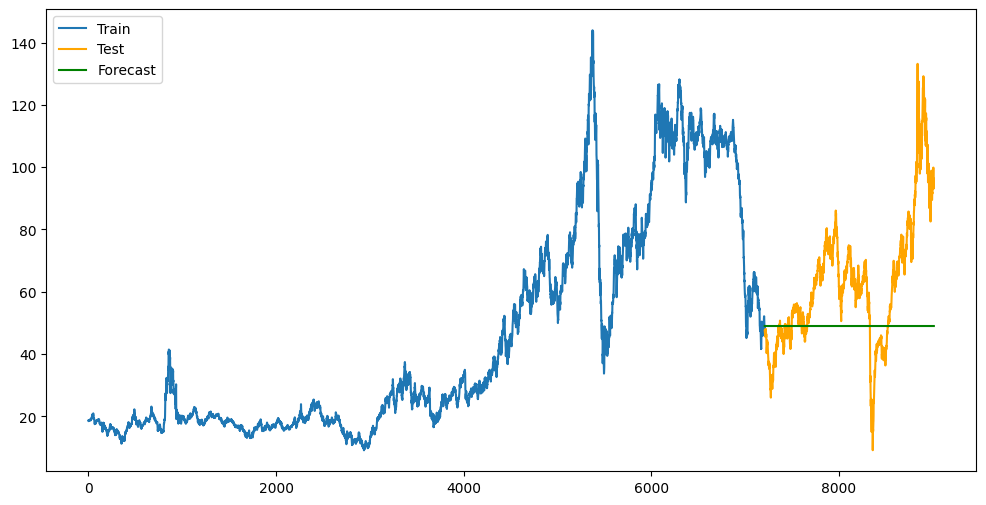

Backtest Metrics: {'MAE': 18.484341205477442, 'RMSE': np.float64(24.833934902765257), 'MAPE': np.float64(27.849586910771855)}


In [62]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define helper function to calculate metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
# Backtesting function
def backtest_arima(prices, order=(1, 1, 1), train_size=0.8):
    train_size = int(len(prices) * train_size)
    train, test = prices[:train_size], prices[train_size:]
    
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=len(test))
    metrics = calculate_metrics(test, forecast)
    
    print("Backtest Metrics:", metrics)
    
    plt.figure(figsize=(12, 6))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test", color="orange")
    plt.plot(test.index, forecast, label="Forecast", color="green")
    plt.legend()
    plt.show()

    return metrics

# Run backtesting on the data
backtest_metrics = backtest_arima(prices, order=(1, 1, 1), train_size=0.8)
print("Backtest Metrics:", backtest_metrics)

Out-of-Sample Metrics: {'MAE': 3.675020567333647, 'RMSE': np.float64(4.3750031847913196), 'MAPE': np.float64(3.8347098382356974)}


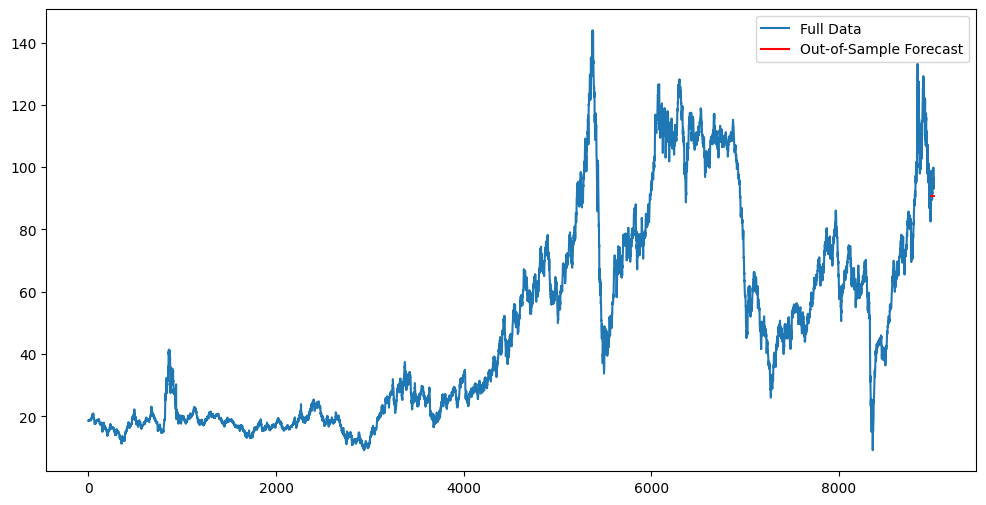

Out-of-Sample Metrics: {'MAE': 3.675020567333647, 'RMSE': np.float64(4.3750031847913196), 'MAPE': np.float64(3.8347098382356974)}


In [63]:
# Out-of-sample testing function
def out_of_sample_testing(prices, order=(1, 1, 1), out_of_sample_period=30):
    train, test = prices[:-out_of_sample_period], prices[-out_of_sample_period:]
    
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=out_of_sample_period)
    metrics = calculate_metrics(test, forecast)
    
    print("Out-of-Sample Metrics:", metrics)
    
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label="Full Data")
    plt.plot(test.index, forecast, label="Out-of-Sample Forecast", color="red")
    plt.legend()
    plt.show()

    return metrics

# Run out-of-sample testing
out_of_sample_metrics = out_of_sample_testing(prices, order=(1, 1, 1), out_of_sample_period=30)
print("Out-of-Sample Metrics:", out_of_sample_metrics)

In [66]:
from sklearn.model_selection import TimeSeriesSplit


# Time series cross-validation function
def time_series_cross_validation(prices, order=(1, 1, 1), n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    errors = []

    for train_index, test_index in tscv.split(prices):
        train, test = prices[train_index], prices[test_index]
        
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        forecast = model_fit.forecast(steps=len(test))
        metrics = calculate_metrics(test, forecast)
        errors.append(metrics)
        print(f"Cross-Validation Fold Metrics: {metrics}")

    avg_metrics = {metric: np.mean([fold[metric] for fold in errors]) for metric in errors[0]}
    print("Average Cross-Validation Metrics:", avg_metrics)

    return avg_metrics

# Run time series cross-validation
cv_metrics = time_series_cross_validation(prices, order=(1, 1, 1), n_splits=5)
print("Cross-Validation Metrics:", cv_metrics)

Cross-Validation Fold Metrics: {'MAE': 2.92075508963924, 'RMSE': np.float64(3.709501482277237), 'MAPE': np.float64(20.319711384044673)}
Cross-Validation Fold Metrics: {'MAE': 14.492162263482392, 'RMSE': np.float64(16.089443098182137), 'MAPE': np.float64(48.469497536484425)}
Cross-Validation Fold Metrics: {'MAE': 29.11278894350086, 'RMSE': np.float64(35.030073350184225), 'MAPE': np.float64(36.382120520106156)}
Cross-Validation Fold Metrics: {'MAE': 25.809370766728232, 'RMSE': np.float64(30.868995349172145), 'MAPE': np.float64(44.76566808557305)}
Cross-Validation Fold Metrics: {'MAE': 17.596383932520528, 'RMSE': np.float64(23.632590327120894), 'MAPE': np.float64(26.565919820951933)}
Average Cross-Validation Metrics: {'MAE': np.float64(17.98629219917425), 'RMSE': np.float64(21.866120721387325), 'MAPE': np.float64(35.30058346943205)}
Cross-Validation Metrics: {'MAE': np.float64(17.98629219917425), 'RMSE': np.float64(21.866120721387325), 'MAPE': np.float64(35.30058346943205)}
